In [ ]:
# Dimensionality Reduction



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [41]:
m = 100
X = 6 * np.random.randn(m, 3) - 3
y = 5*X[:,0] + 7*X[:,1] + 2 + np.random.randn(m,1).flatten()

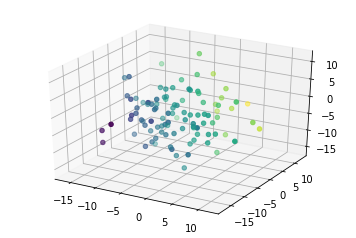

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

# Singular Value Decomposition (SVD)
* centering the data is important
* yield principal components of the data

In [43]:
X_centered = X-X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]

In [44]:
V.T

array([[-0.71339165, -0.69671839,  0.07520528],
       [ 0.6616915 , -0.63438798,  0.39964515],
       [ 0.23073081, -0.33486621, -0.91357973]])

In [45]:
# in scikit-learn

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [47]:
pca.explained_variance_ratio_

array([0.3976106 , 0.34785281])

In [50]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target

In [64]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum >= 0.95) + 1

In [85]:
print(f"{len(X[0])} dimensional dataset", "\n"
      f"95% of variance can be explained by {d} dimensions")

64 dimensional dataset 
95% of variance can be explained by 29 dimensions


Text(0,0.5,'% of explained variance')

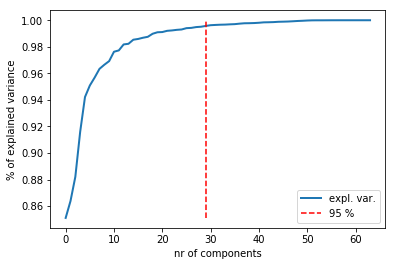

In [80]:
var_curve=1-pca.explained_variance_ratio_
plt.plot(var_curve, linewidth=2, label="expl. var.")
plt.plot([d,d],[var_curve.min(),1], 'r--', label="95 %")
plt.axis('tight')
plt.legend()
plt.xlabel("nr of components")
plt.ylabel("% of explained variance")

In [61]:
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(X)

In [62]:
f"{len(X_red[0])} dimensional dataset"

'29 dimensional dataset'


* Incremental PCA
* Kernel PCA
* Locally Linear Embedding
* Isomap
* Linear Discriminant Analysis
* Latent Dirichlet Allocation
* t-Distributed Stochastic Neighbor Embedding (t-SNE